# Holstein MPO

$$
\sum_{i=1}^{3}
\begin{bmatrix}
\frac{\omega}{2}\left(p_i^2+q_i^2\right)  & \lambda q_i \\
\lambda q_i & \frac{\omega}{2}\left(p_i^2+q_i^2\right)+ \kappa q_i
\end{bmatrix}
+
\begin{bmatrix}
0  & J \\
J & \Delta E
\end{bmatrix}
$$

In [1]:
import numpy as np
import sympy

from pympo import (
    AssignManager,
    OpSite,
    SumOfProducts,
)

In [2]:
Holstein = SumOfProducts()
omega = sympy.Symbol("omega")
lam = sympy.Symbol("lambda")
kappa = sympy.Symbol("kappa")
ΔE = sympy.Symbol(r"\Delta E")
J = sympy.Symbol("J")
ndim = 4

ints_p2 = np.ones((3, 3))
ints_q = np.ones((3,))
ints_q2 = np.ones((3,))

p2_ops = [OpSite(r"\hat{p}^2" + f"_{i}", i, value=ints_p2) for i in range(ndim)]
q2_ops = [OpSite(r"\hat{q}^2" + f"_{i}", i, value=ints_q2) for i in range(ndim)]
q_ops = [OpSite(r"\hat{q}" + f"_{i}", i, value=ints_q) for i in range(ndim)]

# Electronic states are second-quantized

adag_op = np.zeros((2, 2))
adag_op[0, 1] = 1.0
adag_ops = [OpSite(r"\hat{a}^\dagger" + f"_{i}", i, value=adag_op) for i in range(ndim)] # creation
a_op = np.zeros((2, 2))
a_op[1, 0] = 1.0
a_ops = [OpSite(r"\hat{a}" + f"_{i}", i, value=a_op) for i in range(ndim)] # annihilation

In [3]:
a_dim = 3 # estate-mode
b_dim = set([0, 1, 2, 3]) - set([a_dim]) # bath-mode
for i in b_dim:
    Holstein += (omega / 2 * (p2_ops[i] + q2_ops[i])) * a_ops[a_dim] * adag_ops[a_dim]
    Holstein += (omega / 2 * (p2_ops[i] + q2_ops[i])) * adag_ops[a_dim] * a_ops[a_dim]
    Holstein += (kappa * (q_ops[i])) * adag_ops[a_dim] * a_ops[a_dim]
    Holstein += (lam * q_ops[i]) * a_ops[a_dim]
    Holstein += (lam * q_ops[i]) * adag_ops[a_dim]
    # Holstein += (lam * q_ops[i]) * (adag_ops[a_dim] + a_ops[a_dim])  # can also work. 

Holstein += ΔE * adag_ops[a_dim] * a_ops[a_dim]
Holstein += J * (adag_ops[ndim-1] + a_ops[ndim-1])
# Following setting also works instead of above line.
# Holstein += J * a_ops[a_dim]
# Holstein += J * adag_ops[a_dim]


Holstein = Holstein.simplify()  # This method find concatenatable operator in advance like q_i*a_j + q_i*a†_j = q_i * (a_j+a†_j)
display(Holstein.symbol)

J*(\hat{a}^\dagger_3 + \hat{a}_3) + \Delta E*\hat{a}^\dagger_3*\hat{a}_3 + kappa*\hat{q}_0*\hat{a}^\dagger_3*\hat{a}_3 + kappa*\hat{q}_1*\hat{a}^\dagger_3*\hat{a}_3 + kappa*\hat{q}_2*\hat{a}^\dagger_3*\hat{a}_3 + lambda*\hat{q}_0*(\hat{a}^\dagger_3 + \hat{a}_3) + lambda*\hat{q}_1*(\hat{a}^\dagger_3 + \hat{a}_3) + lambda*\hat{q}_2*(\hat{a}^\dagger_3 + \hat{a}_3) + omega*(\hat{p}^2_0 + \hat{q}^2_0)*\hat{a}^\dagger_3*\hat{a}_3/2 + omega*(\hat{p}^2_0 + \hat{q}^2_0)*\hat{a}_3*\hat{a}^\dagger_3/2 + omega*(\hat{p}^2_1 + \hat{q}^2_1)*\hat{a}^\dagger_3*\hat{a}_3/2 + omega*(\hat{p}^2_1 + \hat{q}^2_1)*\hat{a}_3*\hat{a}^\dagger_3/2 + omega*(\hat{p}^2_2 + \hat{q}^2_2)*\hat{a}^\dagger_3*\hat{a}_3/2 + omega*(\hat{p}^2_2 + \hat{q}^2_2)*\hat{a}_3*\hat{a}^\dagger_3/2

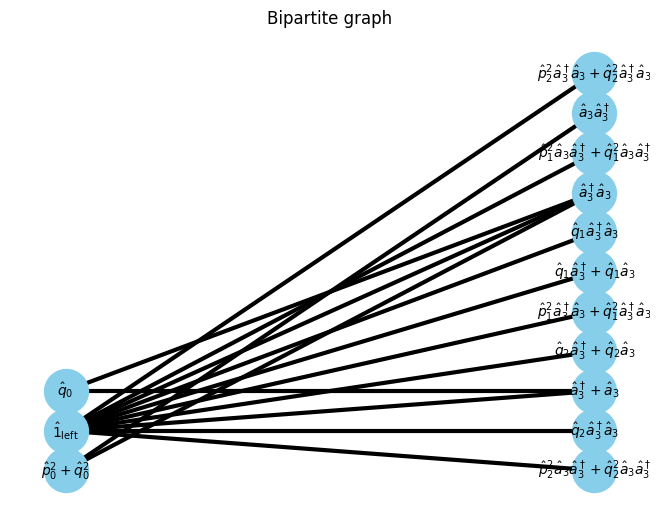

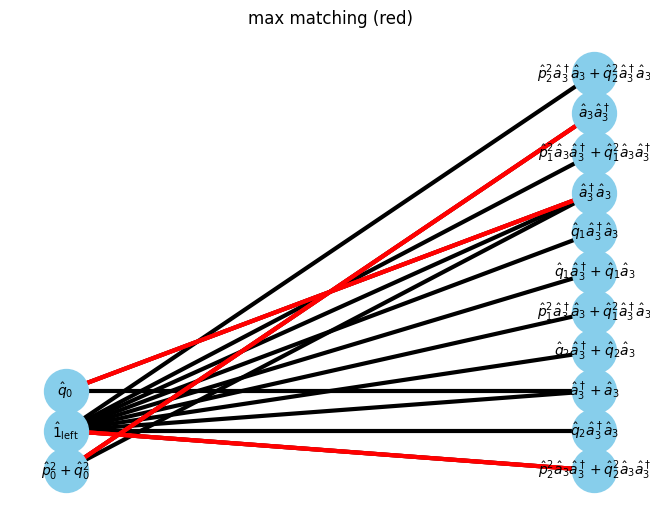

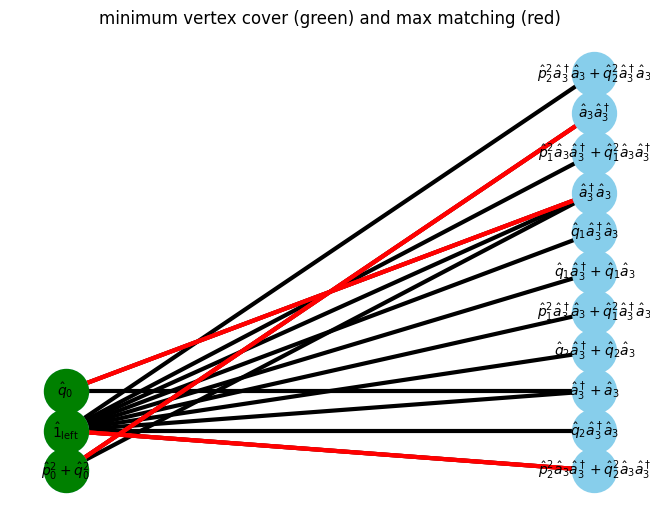

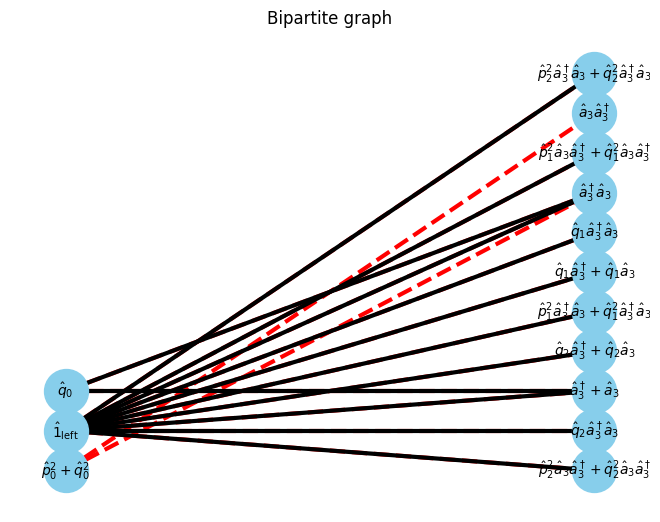

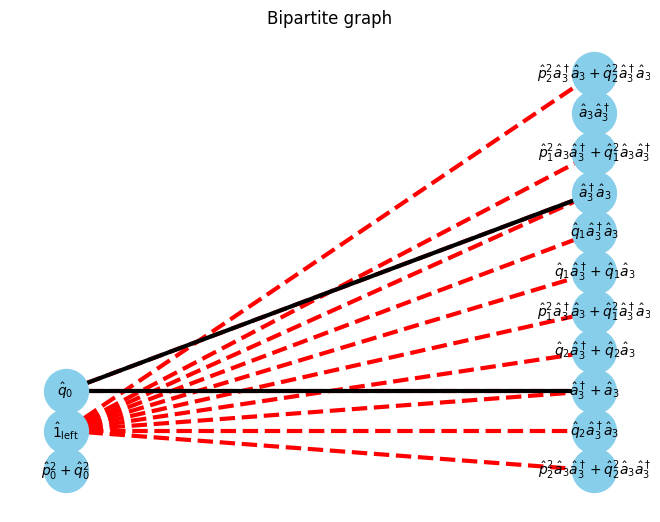

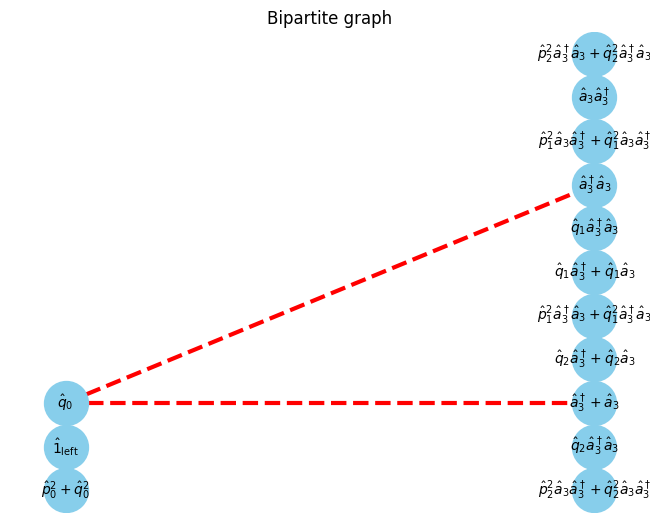

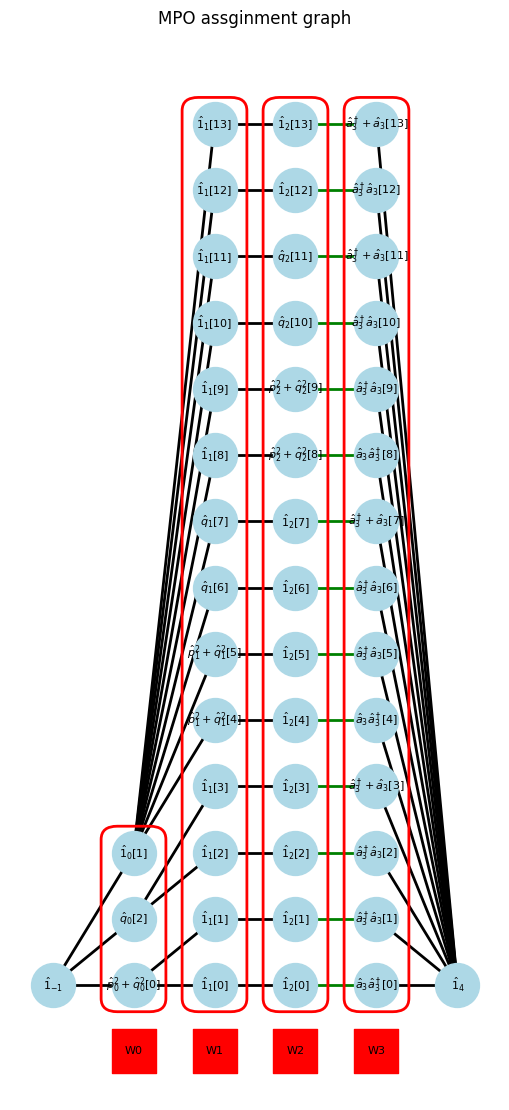

Matrix([[\hat{p}^2_0 + \hat{q}^2_0, 1, \hat{q}_0]])

isite=1


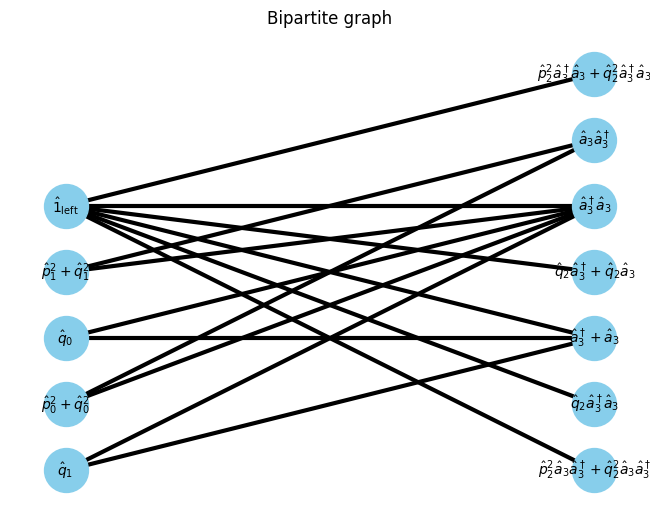

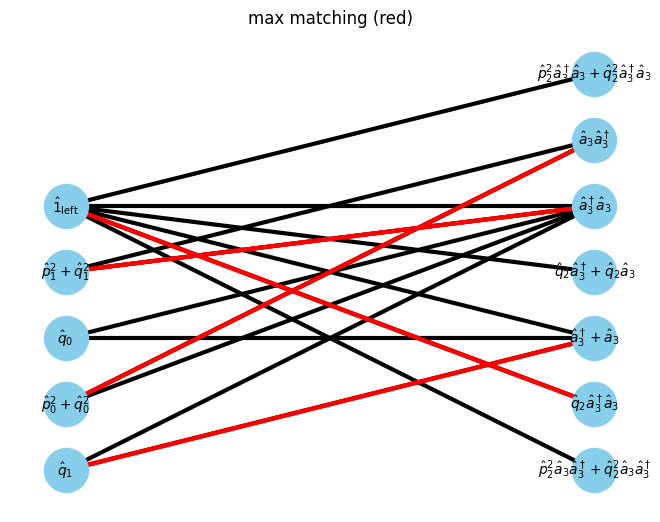

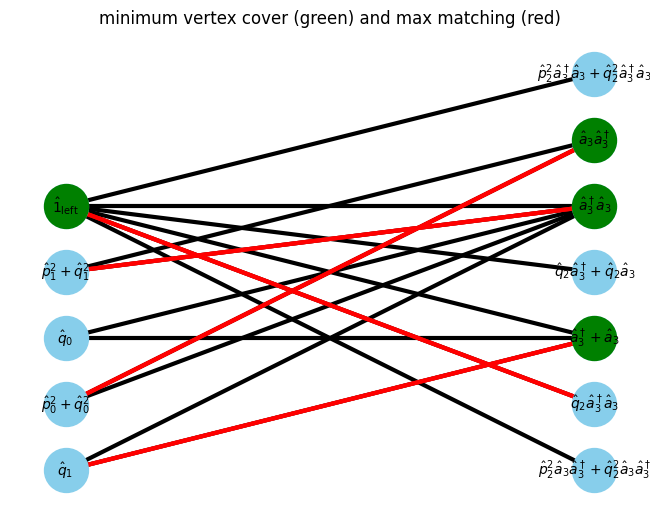

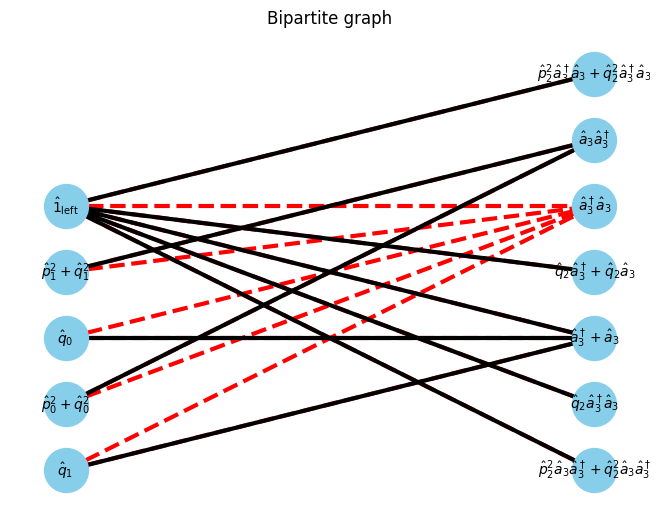

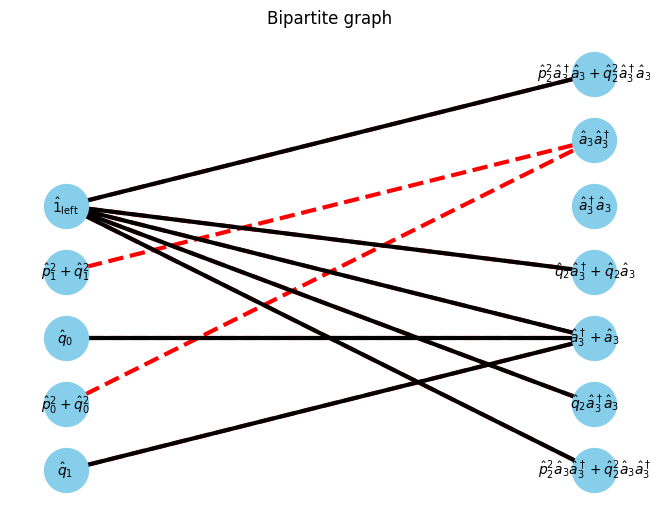

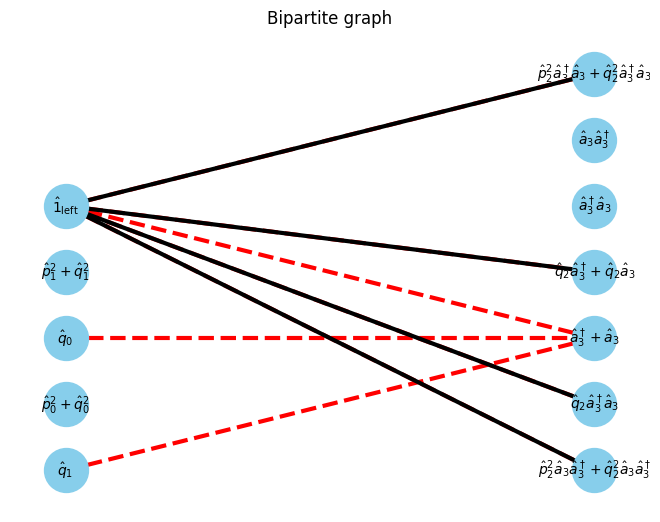

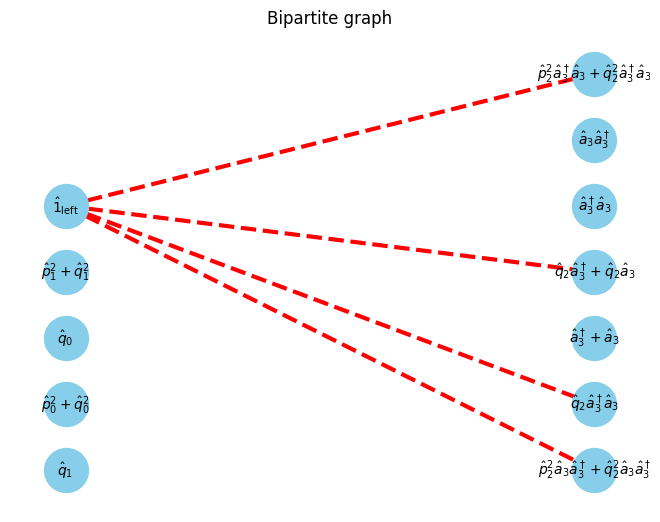

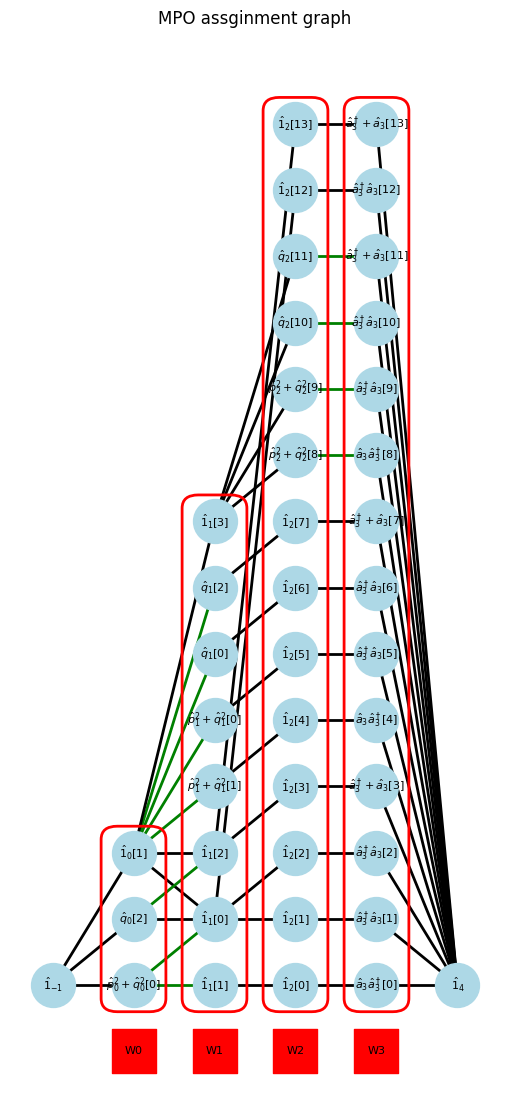

Matrix([[\hat{p}^2_0 + \hat{q}^2_0, 1, \hat{q}_0]])

Matrix([
[                                                         omega/2,                             omega/2,                    0, 0],
[\Delta E + kappa*\hat{q}_1 + omega*(\hat{p}^2_1 + \hat{q}^2_1)/2, omega*(\hat{p}^2_1 + \hat{q}^2_1)/2, J + lambda*\hat{q}_1, 1],
[                                                           kappa,                                   0,               lambda, 0]])

W0 W1 =


Matrix([[\Delta E + kappa*\hat{q}_0 + kappa*\hat{q}_1 + omega*\hat{p}^2_0/2 + omega*\hat{p}^2_1/2 + omega*\hat{q}^2_0/2 + omega*\hat{q}^2_1/2, omega*\hat{p}^2_0/2 + omega*\hat{p}^2_1/2 + omega*\hat{q}^2_0/2 + omega*\hat{q}^2_1/2, J + lambda*\hat{q}_0 + lambda*\hat{q}_1, 1]])

isite=2


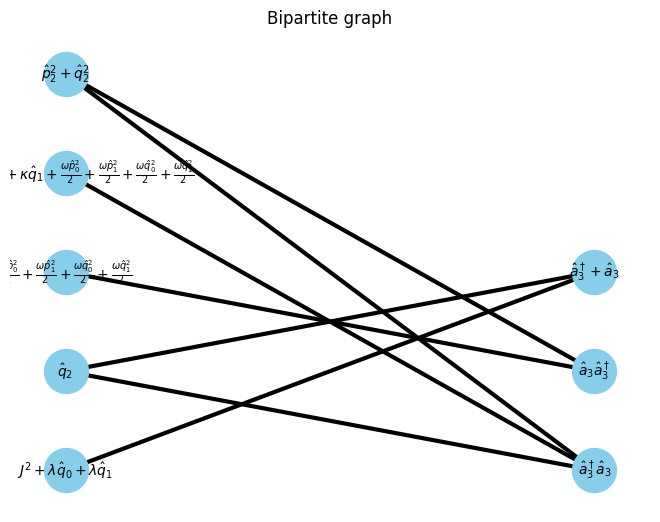

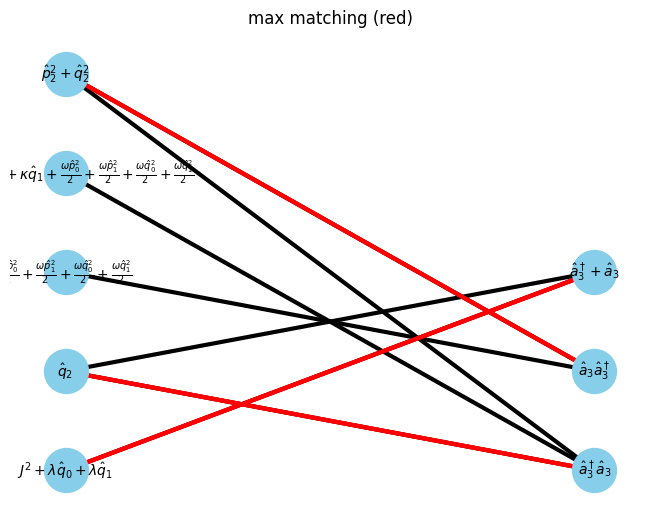

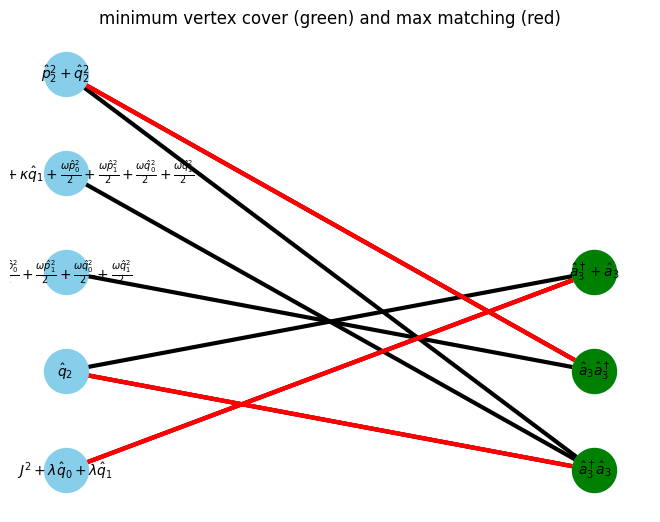

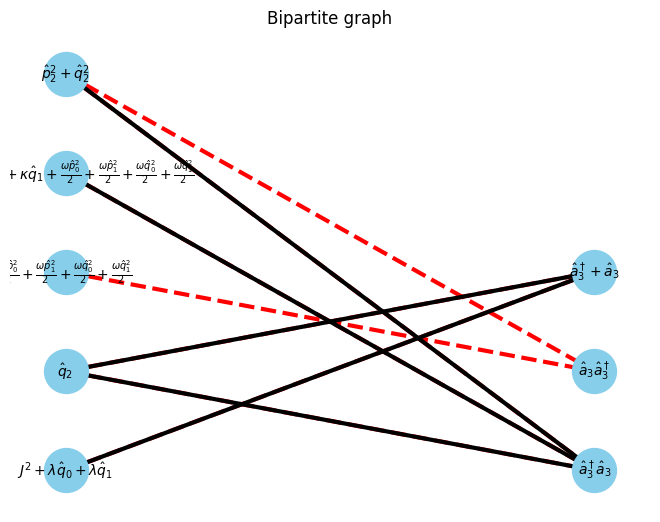

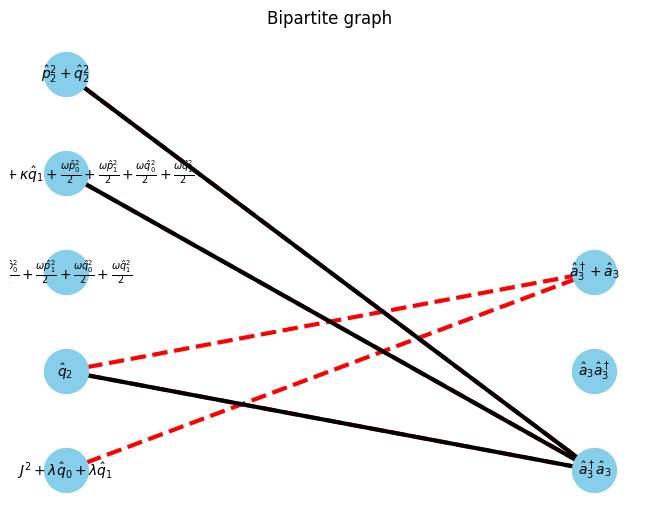

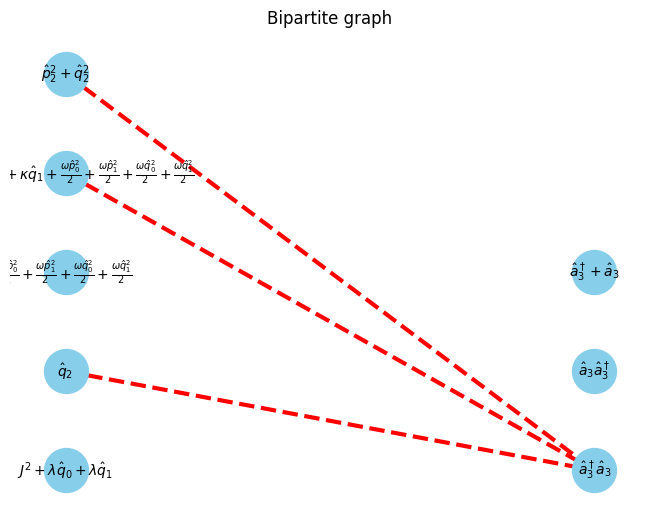

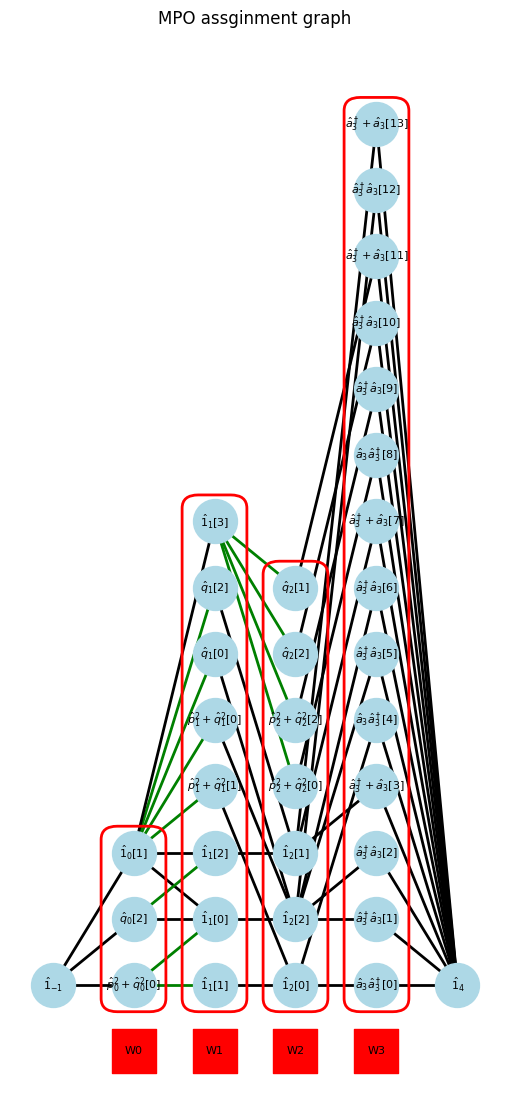

Matrix([[\hat{p}^2_0 + \hat{q}^2_0, 1, \hat{q}_0]])

Matrix([
[                                                         omega/2,                             omega/2,                    0, 0],
[\Delta E + kappa*\hat{q}_1 + omega*(\hat{p}^2_1 + \hat{q}^2_1)/2, omega*(\hat{p}^2_1 + \hat{q}^2_1)/2, J + lambda*\hat{q}_1, 1],
[                                                           kappa,                                   0,               lambda, 0]])

Matrix([
[                                  0,                0,                                                     1],
[                                  1,                0,                                                     0],
[                                  0,                1,                                                     0],
[omega*(\hat{p}^2_2 + \hat{q}^2_2)/2, lambda*\hat{q}_2, kappa*\hat{q}_2 + omega*(\hat{p}^2_2 + \hat{q}^2_2)/2]])

W0 W1 W2 =


Matrix([[omega*\hat{p}^2_0/2 + omega*\hat{p}^2_1/2 + omega*\hat{p}^2_2/2 + omega*\hat{q}^2_0/2 + omega*\hat{q}^2_1/2 + omega*\hat{q}^2_2/2, J + lambda*\hat{q}_0 + lambda*\hat{q}_1 + lambda*\hat{q}_2, \Delta E + kappa*\hat{q}_0 + kappa*\hat{q}_1 + kappa*\hat{q}_2 + omega*\hat{p}^2_0/2 + omega*\hat{p}^2_1/2 + omega*\hat{p}^2_2/2 + omega*\hat{q}^2_0/2 + omega*\hat{q}^2_1/2 + omega*\hat{q}^2_2/2]])

isite=3


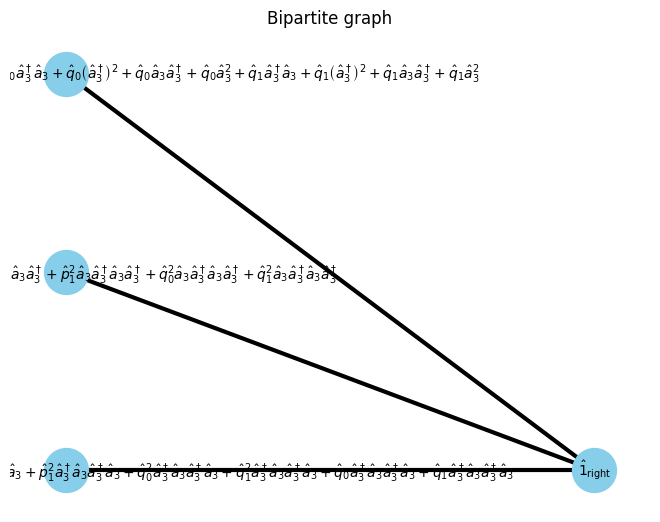

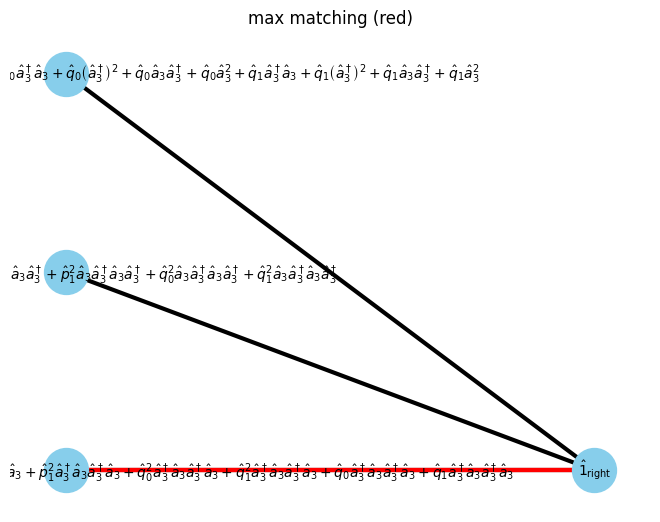

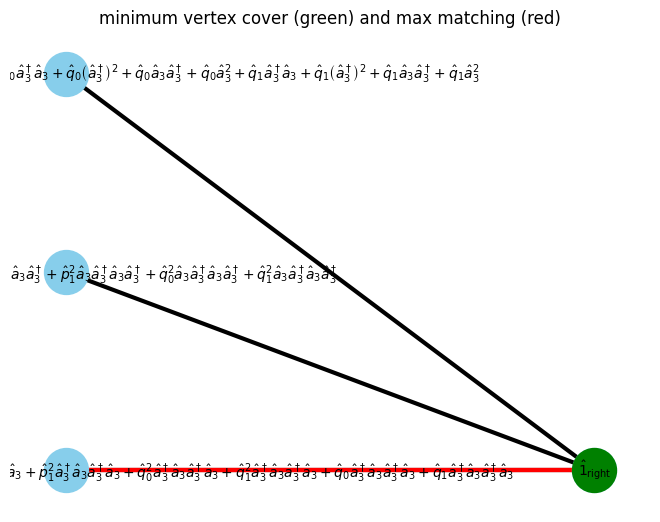

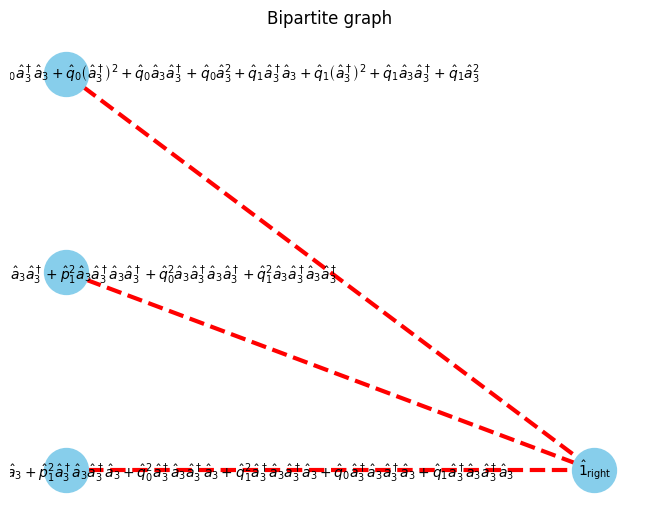

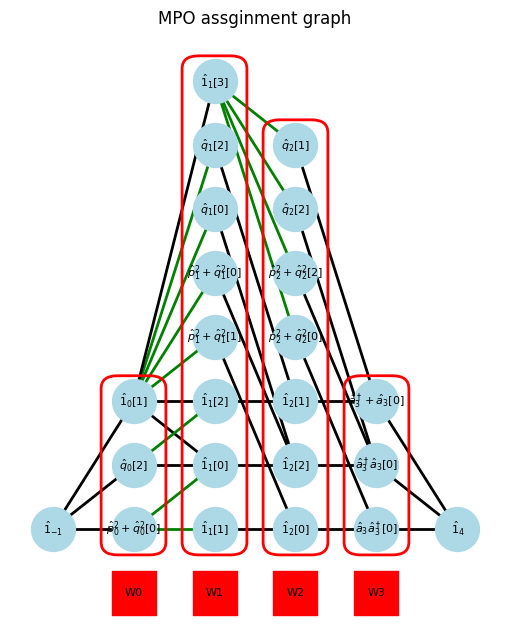

Matrix([[\hat{p}^2_0 + \hat{q}^2_0, 1, \hat{q}_0]])

Matrix([
[                                                         omega/2,                             omega/2,                    0, 0],
[\Delta E + kappa*\hat{q}_1 + omega*(\hat{p}^2_1 + \hat{q}^2_1)/2, omega*(\hat{p}^2_1 + \hat{q}^2_1)/2, J + lambda*\hat{q}_1, 1],
[                                                           kappa,                                   0,               lambda, 0]])

Matrix([
[                                  0,                0,                                                     1],
[                                  1,                0,                                                     0],
[                                  0,                1,                                                     0],
[omega*(\hat{p}^2_2 + \hat{q}^2_2)/2, lambda*\hat{q}_2, kappa*\hat{q}_2 + omega*(\hat{p}^2_2 + \hat{q}^2_2)/2]])

Matrix([
[  \hat{a}_3*\hat{a}^\dagger_3],
[\hat{a}^\dagger_3 + \hat{a}_3],
[  \hat{a}^\dagger_3*\hat{a}_3]])

W0 W1 W2 W3 =


Matrix([[J*\hat{a}^\dagger_3 + J*\hat{a}_3 + \Delta E*\hat{a}^\dagger_3*\hat{a}_3 + kappa*\hat{q}_0*\hat{a}^\dagger_3*\hat{a}_3 + kappa*\hat{q}_1*\hat{a}^\dagger_3*\hat{a}_3 + kappa*\hat{q}_2*\hat{a}^\dagger_3*\hat{a}_3 + lambda*\hat{q}_0*\hat{a}^\dagger_3 + lambda*\hat{q}_0*\hat{a}_3 + lambda*\hat{q}_1*\hat{a}^\dagger_3 + lambda*\hat{q}_1*\hat{a}_3 + lambda*\hat{q}_2*\hat{a}^\dagger_3 + lambda*\hat{q}_2*\hat{a}_3 + omega*\hat{p}^2_0*\hat{a}^\dagger_3*\hat{a}_3/2 + omega*\hat{p}^2_0*\hat{a}_3*\hat{a}^\dagger_3/2 + omega*\hat{p}^2_1*\hat{a}^\dagger_3*\hat{a}_3/2 + omega*\hat{p}^2_1*\hat{a}_3*\hat{a}^\dagger_3/2 + omega*\hat{p}^2_2*\hat{a}^\dagger_3*\hat{a}_3/2 + omega*\hat{p}^2_2*\hat{a}_3*\hat{a}^\dagger_3/2 + omega*\hat{q}^2_0*\hat{a}^\dagger_3*\hat{a}_3/2 + omega*\hat{q}^2_0*\hat{a}_3*\hat{a}^\dagger_3/2 + omega*\hat{q}^2_1*\hat{a}^\dagger_3*\hat{a}_3/2 + omega*\hat{q}^2_1*\hat{a}_3*\hat{a}^\dagger_3/2 + omega*\hat{q}^2_2*\hat{a}^\dagger_3*\hat{a}_3/2 + omega*\hat{q}^2_2*\hat{a}_3*\h

In [4]:
from pympo import (
    OpSite,
    SumOfProducts,
    assign_core,
    get_UVE,
    show_assigns,
    show_bipartite,
    show_maximal_matching,
    show_min_vertex_cover,
)
Hamiltonian = Holstein
W_assigns: list[list[int]] = [
    [k for _ in range(Hamiltonian.ndim)] for k in range(Hamiltonian.nops)
]
coef_site: list[int] = [Hamiltonian.ndim - 1 for _ in range(Hamiltonian.nops)]
W: list[sympy.Basic] = []
U, V, E, E_assigns = get_UVE(Hamiltonian, W_assigns, 0)
G, pos = show_bipartite(U, V, E)
max_matching = show_maximal_matching(G, pos)
min_vertex_cover = show_min_vertex_cover(G, pos, max_matching)
Unew, Wi = assign_core(
    min_vertex_cover=min_vertex_cover,
    U=U,
    V=V,
    E=E,
    operators=Hamiltonian,
    isite=0,
    W_assigns=W_assigns,
    E_assigns=E_assigns,
    coef_site=coef_site,
    visualize=True,
)
W.append(Wi)
display(*W)

for isite in range(1, Hamiltonian.ndim):
    print(f"{isite=}")
    U, V, E, E_assigns = get_UVE(Hamiltonian, W_assigns, isite, Unew)
    G, pos = show_bipartite(U, V, E)
    max_matching = show_maximal_matching(G, pos)
    min_vertex_cover = show_min_vertex_cover(G, pos, max_matching)
    Unew, Wi = assign_core(
        min_vertex_cover=min_vertex_cover,
        U=U,
        V=V,
        E=E,
        operators=Hamiltonian,
        isite=isite,
        W_assigns=W_assigns,
        E_assigns=E_assigns,
        coef_site=coef_site,
        visualize=True,
    )
    W.append(Wi)
    display(*W)
    W_prod = sympy.Mul(*W)
    print(*[f"W{i}" for i in range(isite + 1)], "=")
    display(W_prod.expand())

## Use `AssignManager` for whole assignment

In [5]:
am = AssignManager(Holstein)
am.assign()
display(*am.Wsym)

2024-12-31 18:07:21.907 | INFO     | pympo.bipartite:assign:286 - assigned 1/4
2024-12-31 18:07:21.908 | INFO     | pympo.bipartite:assign:286 - assigned 2/4
2024-12-31 18:07:21.910 | INFO     | pympo.bipartite:assign:286 - assigned 3/4
2024-12-31 18:07:21.911 | INFO     | pympo.bipartite:assign:286 - assigned 4/4


Matrix([[\hat{p}^2_0 + \hat{q}^2_0, 1, \hat{q}_0]])

Matrix([
[                   0,                             omega/2,                                                          omega/2, 0],
[J + lambda*\hat{q}_1, omega*(\hat{p}^2_1 + \hat{q}^2_1)/2, \Delta E + kappa*\hat{q}_1 + omega*(\hat{p}^2_1 + \hat{q}^2_1)/2, 1],
[              lambda,                                   0,                                                            kappa, 0]])

Matrix([
[                                  0,                                                     0,                1],
[                                  1,                                                     0,                0],
[                                  0,                                                     1,                0],
[omega*(\hat{p}^2_2 + \hat{q}^2_2)/2, kappa*\hat{q}_2 + omega*(\hat{p}^2_2 + \hat{q}^2_2)/2, lambda*\hat{q}_2]])

Matrix([
[  \hat{a}_3*\hat{a}^\dagger_3],
[  \hat{a}^\dagger_3*\hat{a}_3],
[\hat{a}^\dagger_3 + \hat{a}_3]])

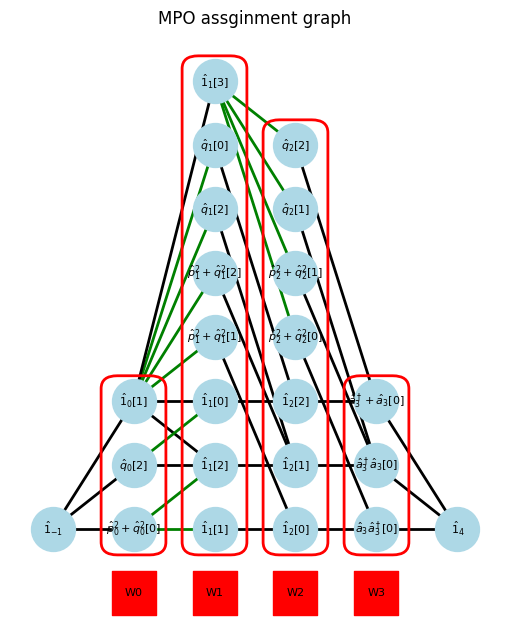

In [6]:
am.show_graph()

In [7]:
W_prod = sympy.Mul(*am.Wsym)
print(*[f"W{i}" for i in range(am.ndim)], "=")
display(W_prod[0].expand())

W0 W1 W2 W3 =


J*\hat{a}^\dagger_3 + J*\hat{a}_3 + \Delta E*\hat{a}^\dagger_3*\hat{a}_3 + kappa*\hat{q}_0*\hat{a}^\dagger_3*\hat{a}_3 + kappa*\hat{q}_1*\hat{a}^\dagger_3*\hat{a}_3 + kappa*\hat{q}_2*\hat{a}^\dagger_3*\hat{a}_3 + lambda*\hat{q}_0*\hat{a}^\dagger_3 + lambda*\hat{q}_0*\hat{a}_3 + lambda*\hat{q}_1*\hat{a}^\dagger_3 + lambda*\hat{q}_1*\hat{a}_3 + lambda*\hat{q}_2*\hat{a}^\dagger_3 + lambda*\hat{q}_2*\hat{a}_3 + omega*\hat{p}^2_0*\hat{a}^\dagger_3*\hat{a}_3/2 + omega*\hat{p}^2_0*\hat{a}_3*\hat{a}^\dagger_3/2 + omega*\hat{p}^2_1*\hat{a}^\dagger_3*\hat{a}_3/2 + omega*\hat{p}^2_1*\hat{a}_3*\hat{a}^\dagger_3/2 + omega*\hat{p}^2_2*\hat{a}^\dagger_3*\hat{a}_3/2 + omega*\hat{p}^2_2*\hat{a}_3*\hat{a}^\dagger_3/2 + omega*\hat{q}^2_0*\hat{a}^\dagger_3*\hat{a}_3/2 + omega*\hat{q}^2_0*\hat{a}_3*\hat{a}^\dagger_3/2 + omega*\hat{q}^2_1*\hat{a}^\dagger_3*\hat{a}_3/2 + omega*\hat{q}^2_1*\hat{a}_3*\hat{a}^\dagger_3/2 + omega*\hat{q}^2_2*\hat{a}^\dagger_3*\hat{a}_3/2 + omega*\hat{q}^2_2*\hat{a}_3*\hat{a}^\da

In [8]:
mpo = am.numerical_mpo(
    subs={ΔE: 1.0, J: 1.0, lam: 1.0, omega: 1.0, kappa: 1.0}
)  # subs is not necessary if you define its value in advance.
mpo

[array([[[[2.+0.j, 1.+0.j, 1.+0.j],
          [1.+0.j, 0.+0.j, 0.+0.j],
          [1.+0.j, 0.+0.j, 0.+0.j]],
 
         [[1.+0.j, 0.+0.j, 0.+0.j],
          [2.+0.j, 1.+0.j, 1.+0.j],
          [1.+0.j, 0.+0.j, 0.+0.j]],
 
         [[1.+0.j, 0.+0.j, 0.+0.j],
          [1.+0.j, 0.+0.j, 0.+0.j],
          [2.+0.j, 1.+0.j, 1.+0.j]]]]),
 array([[[[0. +0.j, 0.5+0.j, 0.5+0.j, 0. +0.j],
          [0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j],
          [0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j]],
 
         [[0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j],
          [0. +0.j, 0.5+0.j, 0.5+0.j, 0. +0.j],
          [0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j]],
 
         [[0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j],
          [0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j],
          [0. +0.j, 0.5+0.j, 0.5+0.j, 0. +0.j]]],
 
 
        [[[2. +0.j, 1. +0.j, 3. +0.j, 1. +0.j],
          [0. +0.j, 0.5+0.j, 0.5+0.j, 0. +0.j],
          [0. +0.j, 0.5+0.j, 0.5+0.j, 0. +0.j]],
 
         [[0. +0.j, 0.5+0.j, 0.5+0.j, 0. +0.j],
          [2. +0.j, 1. +0.j